# **Time analysis**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import os

import data_handling
import plots
import constants

## **Constants**

In [2]:
METRIC_EVALUATION_FOLDER = constants.METRIC_EVALUATION_FOLDER
TIME_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'time_evaluation.csv')

## **Dataset**

In [3]:
df = pd.read_csv(TIME_RESULTS)
df.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
305,2023-07-14 10:17:18.115462,gn_es_july_transformer_cpu_nodenode21_fp16.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,25.486222,80,"{'fp16': [], 'train-sets': ['/docker/home/mari..."
306,2023-07-14 10:22:33.705725,gn_es_july_transformer_cpu_nodenode21_fp16.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.438092,90,"{'fp16': [], 'train-sets': ['/docker/home/mari..."
307,2023-07-14 10:22:33.705725,gn_es_july_transformer_cpu_nodenode21_fp16.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,23.330517,90,"{'fp16': [], 'train-sets': ['/docker/home/mari..."
308,2023-07-14 10:27:44.682896,gn_es_july_transformer_cpu_nodenode21_fp16.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.430844,100,"{'fp16': [], 'train-sets': ['/docker/home/mari..."
309,2023-07-14 10:27:44.682896,gn_es_july_transformer_cpu_nodenode21_fp16.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,23.162148,100,"{'fp16': [], 'train-sets': ['/docker/home/mari..."


**Add time column**

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
# Calculate duration between each score
df['duration'] = df[df['score_type'] == 'sacrebleu_corpus_chrf']['date'].diff().dt.total_seconds()

# Remove first time for each model (as it is being compared with an undefined value)
for idx, row in df.iterrows():
    if row['epoch'] == 10:
        df.loc[idx, 'duration'] = np.nan

# Remove 0 values
min_threshold = 10
max_threshold = 500
df['duration'] = df['duration'].apply(lambda x: x if x > min_threshold else np.nan)
df['duration'] = df['duration'].apply(lambda x: x if x < max_threshold else np.nan)

df.head()

,date,model_name,source,target,score_type,score,epoch,parameters,duration
0,2023-07-11 08:46:30.334846,gn_es_july_transformer_cpu_nodenode23.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.146996,10,{'train-sets': ['/docker/home/marianmt/artifac...,NaN
1,2023-07-11 08:46:30.334846,gn_es_july_transformer_cpu_nodenode23.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,25.118142,10,{'train-sets': ['/docker/home/marianmt/artifac...,NaN
2,2023-07-11 08:51:32.160479,gn_es_july_transformer_cpu_nodenode23.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.210192,20,{'train-sets': ['/docker/home/marianmt/artifac...,NaN
3,2023-07-11 08:51:32.160479,gn_es_july_transformer_cpu_nodenode23.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,25.079789,20,{'train-sets': ['/docker/home/marianmt/artifac...,301.825633
4,2023-07-11 08:56:34.078529,gn_es_july_transformer_cpu_nodenode23.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.924341,30,{'train-sets': ['/docker/home/marianmt/artifac...,NaN


In [6]:
df.groupby('model_name')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
model_name,,,,,,,,
gn_es_july_transformer_cpu.npz,1.0,468.982696,NaN,468.982696,468.982696,468.982696,468.982696,468.982696
gn_es_july_transformer_cpu_nodenode20_5_ram32.npz,9.0,339.290913,9.128400,326.747979,333.684416,340.144672,347.186945,353.160589
gn_es_july_transformer_cpu_nodenode21_5_ram32.npz,9.0,385.147399,10.824592,368.666289,376.070998,385.337110,393.128967,400.497766
gn_es_july_transformer_cpu_nodenode21_fp16.npz,9.0,320.951094,7.824797,310.977171,316.235780,319.992482,322.671620,339.120970
gn_es_july_transformer_cpu_nodenode23.npz,16.0,303.515331,3.104215,298.622040,301.894946,302.438503,305.784137,308.268837
gn_es_july_transformer_cpu_nodenode23_2.npz,18.0,298.962907,5.618729,291.374117,294.015934,298.289615,303.840285,308.186843
gn_es_july_transformer_cpu_nodenode23_3.npz,18.0,298.225674,10.020006,277.896649,290.173931,301.644904,303.489797,308.790947
gn_es_july_transformer_cpu_nodenode23_4.npz,18.0,300.497223,5.536931,289.255318,298.796212,302.563815,304.203125,306.471489
gn_es_test_grid_july_type_transformer.npz,10.0,399.886077,14.250755,366.704329,399.548493,404.373157,408.164535,413.574565


f:\AlexisF\python\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


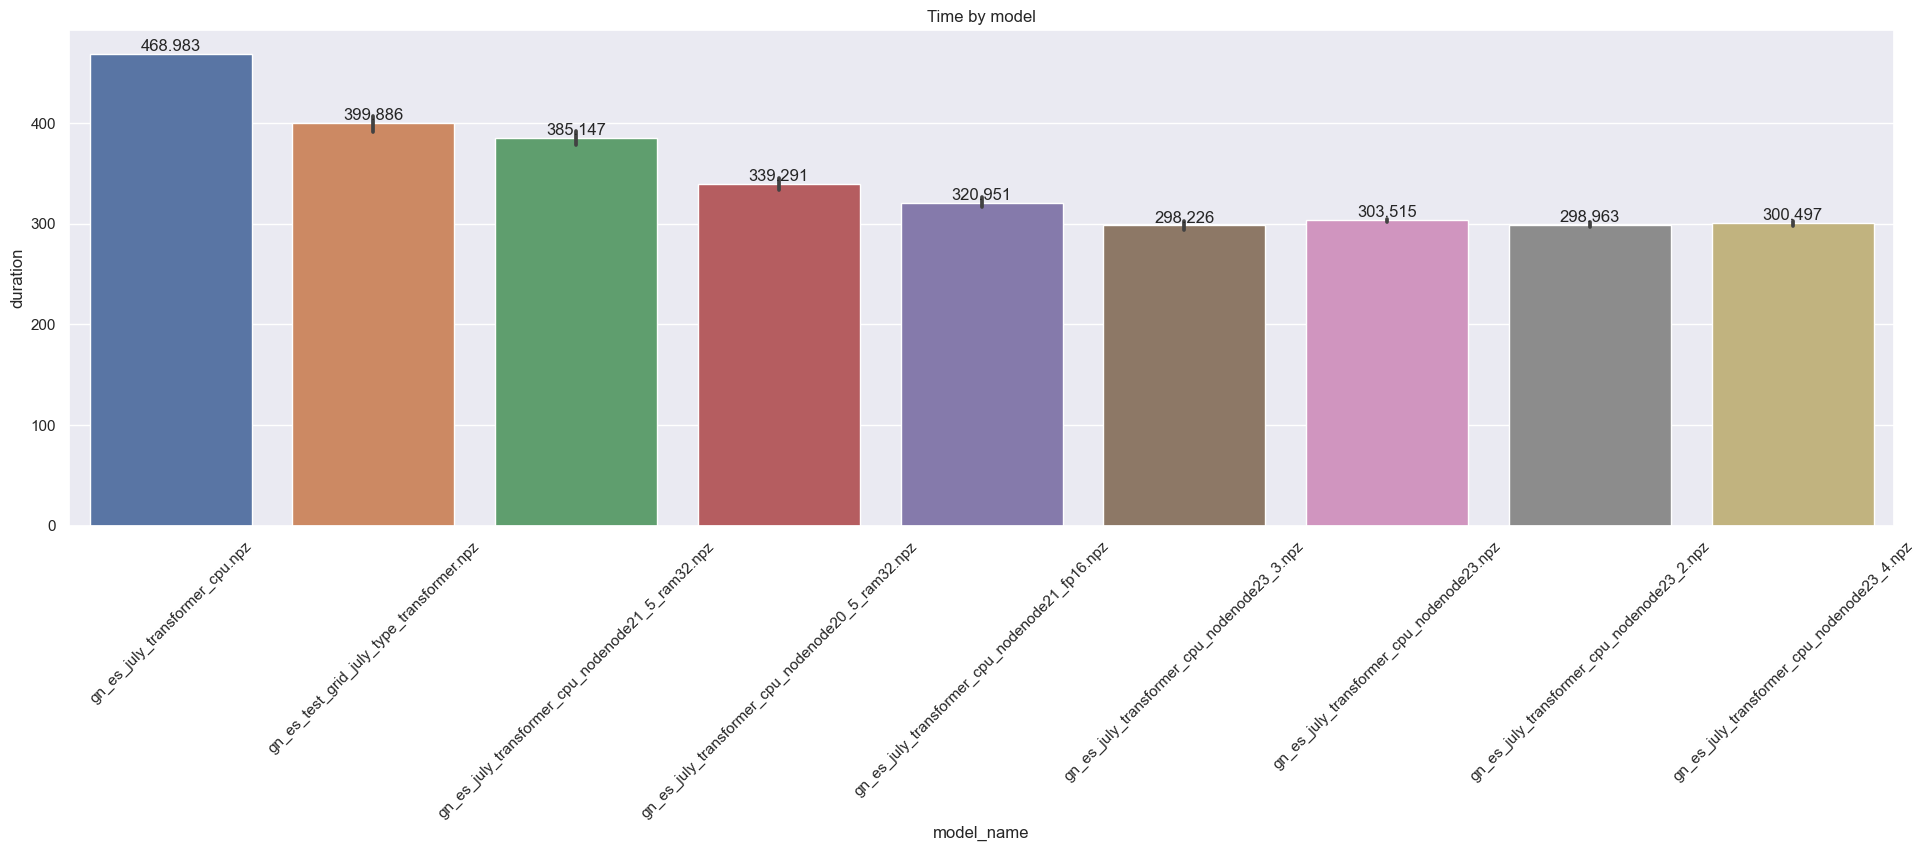

In [19]:
plots.plot_time_by_model(df, title='Time by model')

**Relevant points:**

- **Node 23** appears to be the fastest node. This makes sense as it has **3 GPUs**, while the other nodes have only **2**.
- Adding **fp16** changed **node21** time from **385s** average to **321s**.
- Tweaking configuration such as number of **CPUs**, **RAM** and **Tasks** does not seem to have a significant impact on the time.
- **Node 23** achieved the best time with **9 CPUs**, **60GB RAM** and **4 tasks**.


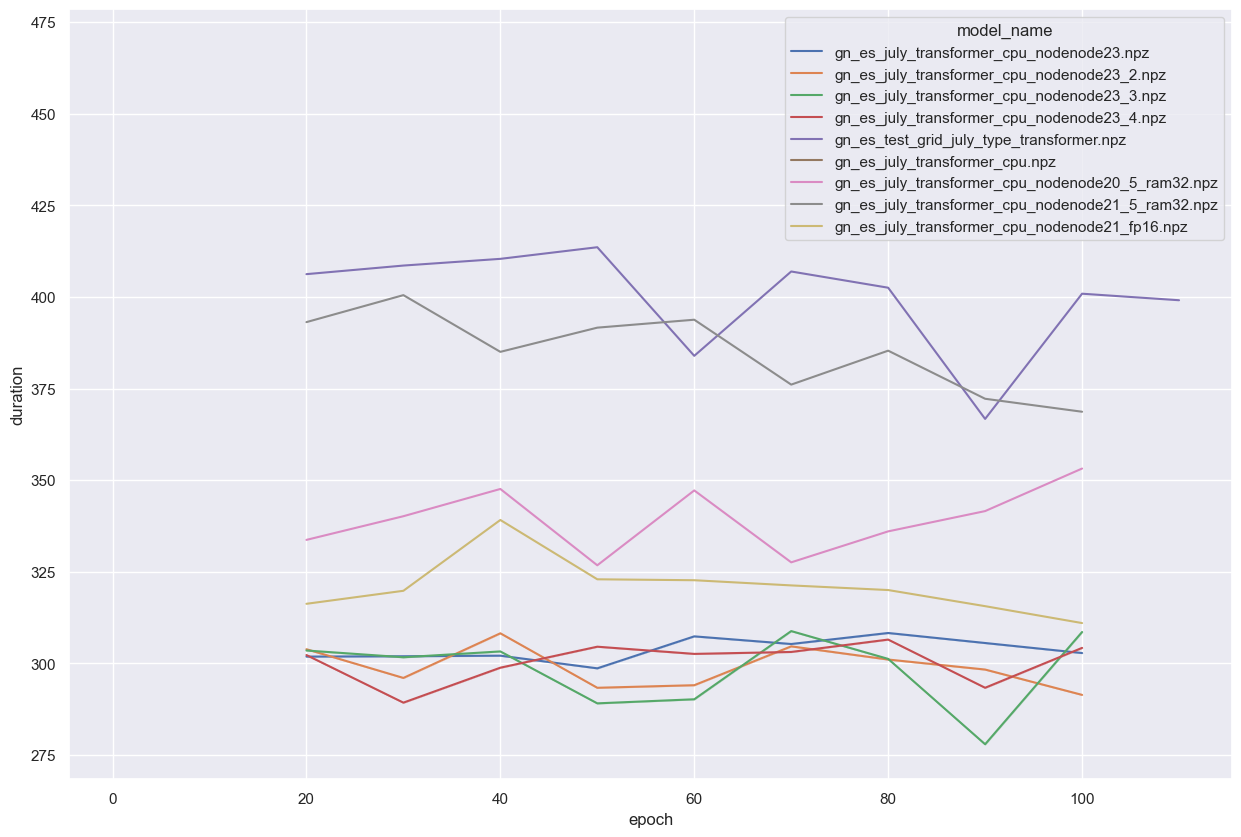

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='epoch', y='duration', hue='model_name', data=df[~df['duration'].isna()], ax=ax);

C:\Users\Alexis\AppData\Local\Temp\ipykernel_20112\4239511725.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df[~df['duration'].isna()], x='duration', hue='model_name', kind='kde', fill=True, height=6, aspect=2);


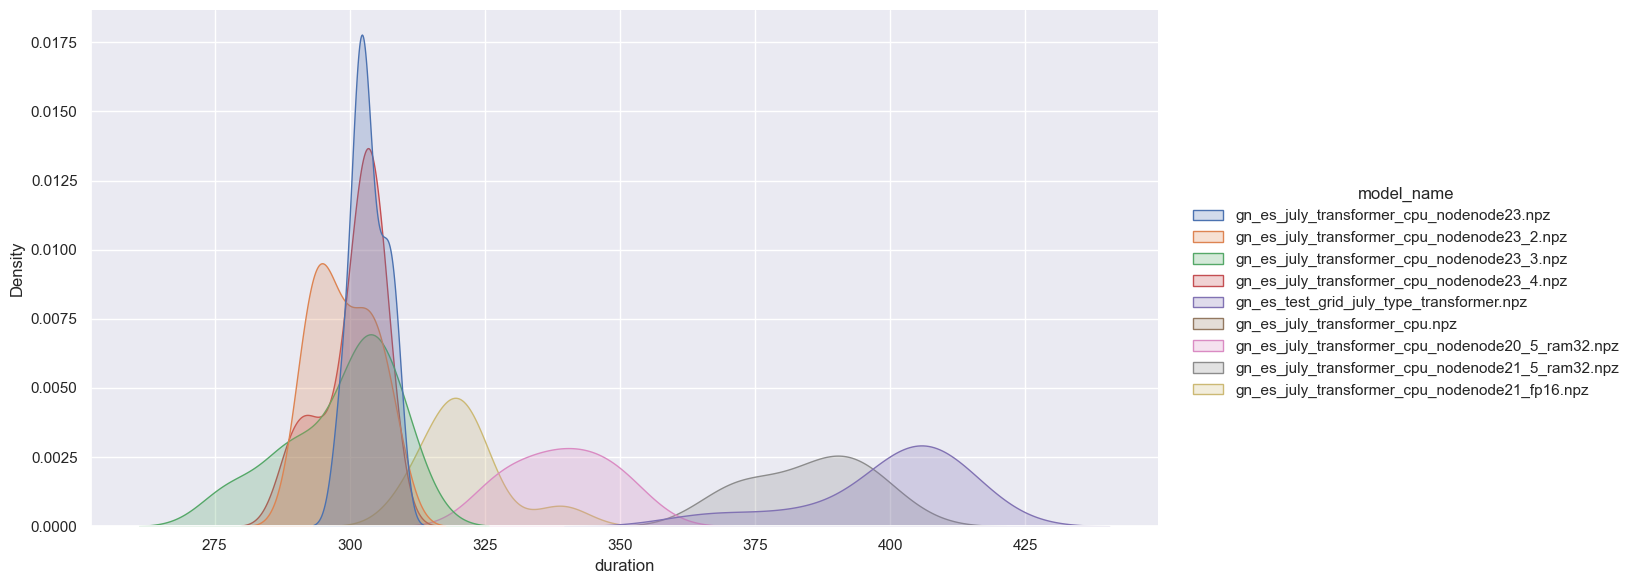

In [21]:
sns.displot(df[~df['duration'].isna()], x='duration', hue='model_name', kind='kde', fill=True, height=6, aspect=2);